#geopandas 

#https://lvis.gsfc.nasa.gov/workshop/LVIS_QGIS_Tutorial_Gabon.pdf

In [1]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *

Bring all the data data in 

In [2]:
# Geopandas 

In [3]:
Shot_RH = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Shot_Sum_AGB_RH.shp')

C:\Users\17183\anaconda3\envs\Geopandas_h5pytest\lib\site-packages\geopandas\array.py:166: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.from_shapely(data), crs=crs)


In [4]:
#Changing CRS 
Shot_RH_4326= Shot_RH.to_crs(epsg=4326)

In [5]:
Shot_RH.columns

Index(['SHOTNUMBER', 'MAX_SHOTNU', 'SUM_m_agb', 'MAX_TIME', 'MAX_GLON',
       'MAX_GLAT', 'MAX_ZG', 'MAX_HLON', 'MAX_HLAT', 'MAX_ZH', 'MAX_TLON',
       'MAX_TLAT', 'MAX_ZT', 'MAX_RH10', 'MAX_RH15', 'MAX_RH20', 'MAX_RH25',
       'MAX_RH30', 'MAX_RH35', 'MAX_RH40', 'MAX_RH45', 'MAX_RH50', 'MAX_RH55',
       'MAX_RH60', 'MAX_RH65', 'MAX_RH70', 'MAX_RH75', 'MAX_RH80', 'MAX_RH85',
       'MAX_RH90', 'MAX_RH95', 'MAX_RH96', 'MAX_RH97', 'MAX_RH98', 'MAX_RH99',
       'MAX_RH100', 'MAX_AZIMUT', 'MAX_INCIDE', 'MAX_RANGE', 'MAX_COMPLE',
       'MAX_CHANNE', 'MAX_CHAN_1', 'MAX_CHAN_2', 'MAX_POINT_', 'MAX_POINT1',
       'geometry'],
      dtype='object')

In [6]:
Shot_RH.head(3)

,SHOTNUMBER,MAX_SHOTNU,SUM_m_agb,MAX_TIME,MAX_GLON,MAX_GLAT,MAX_ZG,MAX_HLON,MAX_HLAT,MAX_ZH,...,MAX_AZIMUT,MAX_INCIDE,MAX_RANGE,MAX_COMPLE,MAX_CHANNE,MAX_CHAN_1,MAX_CHAN_2,MAX_POINT_,MAX_POINT1,geometry
0,9361768,9361768,494.90,45679.155,9.422531,0.582776,20.96,-999,-999,-999,...,351.15,2.877,7713.77,-999,1,1,1,9.422531,0.582776,"MULTIPOINT (547007.784 64418.388, 547007.821 6..."
1,9361769,9361769,2857.33,45679.156,9.422529,0.582682,19.35,-999,-999,-999,...,350.90,2.800,7716.76,-999,1,1,1,9.422529,0.582682,"MULTIPOINT (547003.851 64393.517, 547004.879 6..."
2,9361773,9361773,1241.81,45679.160,9.422520,0.582305,13.10,-999,-999,-999,...,349.68,2.494,7722.14,-999,1,1,1,9.422520,0.582305,"MULTIPOINT (547014.572 64359.092, 547015.721 6..."


##### Finding AGB

Aboveground Biomass(AGB) is the amount of living matter above the ground. The foumulat bellow is from "Comparison of Small- and Large-Footprint Lidar Characterization of Tropical Forest Aboveground Structure and Biomass: A Case Study From Central Gabon (Silva, et al. 2018)" in it they use AGB (kg) = 0.0673 × (ρ × dbh2 × ht)0.976 they which is Chave formula (Chave , et al. 2015)

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

were dbh is in cm, ht is in m, and ρ is the wood density in g·cm−3.
The total AGB at plot level was then obtained by summing
individual stem biomass estimates and converting it to Mg·ha−1.


Returning to out formula we need the find the ρ which is densentity. The can be found using the 

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

were dbh is in cm, ht is in m, and ρ is the wood density in g·cm−3. The total AGB at plot level was then obtained by summing individual stem biomass estimates and converting it to Mg·ha−1.

The wood density came from the following two papers 


[1] J. Chave, D. A. Coomes, S. Jansen, S. L. Lewis, N. G. Swenson,
and A. E. Zanne, “Towards a worldwide wood economics spectrum,”
Ecol. Lett., vol. 12, no. 4, pp. 351–366, 2009. [Online]. Available:
https://doi.org/10.1111/j.1461-0248.2009.01285.x
[42] A. E. Zanne et al., Data from: Towards a Worldwide Wood Economics Spectrum, Dryad Digital Repository, 2009. [Online]. Available:
https://doi.org/10.5061/dryad.234

This is bringing in the would density database for the ρ

The would Density in data set is wsg field and it comes from the data set listed above 

I will be going foward with 0.228 because that is the median value 

AGB (kg) = 0.0673 × (0.228 × dbh^2 × ht)^0.976


the next step is to find the hieght. to find the Height I will be using the LVIS for in read that is found next to the 

In [7]:
#LVISshot = LVIS[(LVIS.LFID == 1657455174)]

In [8]:
Shot_RH

,SHOTNUMBER,MAX_SHOTNU,SUM_m_agb,MAX_TIME,MAX_GLON,MAX_GLAT,MAX_ZG,MAX_HLON,MAX_HLAT,MAX_ZH,...,MAX_AZIMUT,MAX_INCIDE,MAX_RANGE,MAX_COMPLE,MAX_CHANNE,MAX_CHAN_1,MAX_CHAN_2,MAX_POINT_,MAX_POINT1,geometry
0,9361768,9361768,494.90,45679.155,9.422531,0.582776,20.96,-999,-999,-999,...,351.15,2.877,7713.77,-999,1,1,1,9.422531,0.582776,"MULTIPOINT (547007.784 64418.388, 547007.821 6..."
1,9361769,9361769,2857.33,45679.156,9.422529,0.582682,19.35,-999,-999,-999,...,350.90,2.800,7716.76,-999,1,1,1,9.422529,0.582682,"MULTIPOINT (547003.851 64393.517, 547004.879 6..."
2,9361773,9361773,1241.81,45679.160,9.422520,0.582305,13.10,-999,-999,-999,...,349.68,2.494,7722.14,-999,1,1,1,9.422520,0.582305,"MULTIPOINT (547014.572 64359.092, 547015.721 6..."
3,9361774,9361774,1016.30,45679.161,9.422518,0.582210,12.93,-999,-999,-999,...,349.32,2.418,7720.93,-999,1,1,1,9.422518,0.582210,"MULTIPOINT (547010.463 64356.244, 547011.425 6..."
4,9361775,9361775,95.51,45679.162,9.422515,0.582116,12.76,-999,-999,-999,...,348.94,2.342,7721.53,-999,2,2,1,9.422515,0.582116,MULTIPOINT (547008.053 64345.327)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,11689984,11689984,38.51,48007.387,9.422303,0.617157,17.01,-999,-999,-999,...,188.60,2.377,7706.54,-999,1,1,1,9.422303,0.617157,MULTIPOINT (546986.937 68219.360)
639,11690158,11690158,18.06,48007.561,9.422156,0.617224,17.05,-999,-999,-999,...,187.90,2.317,7705.34,-999,1,1,1,9.422156,0.617224,MULTIPOINT (546975.945 68219.769)
640,11690162,11690162,311.37,48007.565,9.422153,0.616846,17.30,-999,-999,-999,...,186.95,2.625,7707.16,-999,1,1,1,9.422153,0.616846,"MULTIPOINT (546972.094 68170.128, 546982.031 6..."
641,11690205,11690205,635.25,48007.608,9.422062,0.616841,17.33,-999,-999,-999,...,187.71,2.633,7705.96,-999,1,1,1,9.422062,0.616841,"MULTIPOINT (546961.378 68164.523, 546961.974 6..."


#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZG,color='r') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH25,color='orange') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH50,color='y')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH75,color='g')
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZT,color='b')
matplotlib.pyplot.show()

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

In [9]:
#https://automating-gis-processes.github.io/2017/lessons/L3/nearest-neighbour.html

In [10]:
#Trees_in_subplots13_22csv = Trees_in_subplots13_22.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_in_subplots13_22.csv')

In [11]:
#LVIS_in_subplots13_22csv = LVIS_in_subplots13_22.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\LVIS_in_subplots13_22.csv')

In [12]:
#Trees_in_subplots13_22 = pd.read_csv (r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_in_subplots13_22.csv')

In [13]:
#LVIS_in_subplots13_22 = pd.read_csv (r'D:\Gabon_Lidar\DATA\pandas_csv\LVIS_in_subplots13_22.csv')

In [14]:
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html#:~:text=%20Filter%20pandas%20dataframe%20by%20column%20value%20,same%20output.%20It%27s%20just%20a%20different...%20More%20

In [15]:
Shot_RH.columns

Index(['SHOTNUMBER', 'MAX_SHOTNU', 'SUM_m_agb', 'MAX_TIME', 'MAX_GLON',
       'MAX_GLAT', 'MAX_ZG', 'MAX_HLON', 'MAX_HLAT', 'MAX_ZH', 'MAX_TLON',
       'MAX_TLAT', 'MAX_ZT', 'MAX_RH10', 'MAX_RH15', 'MAX_RH20', 'MAX_RH25',
       'MAX_RH30', 'MAX_RH35', 'MAX_RH40', 'MAX_RH45', 'MAX_RH50', 'MAX_RH55',
       'MAX_RH60', 'MAX_RH65', 'MAX_RH70', 'MAX_RH75', 'MAX_RH80', 'MAX_RH85',
       'MAX_RH90', 'MAX_RH95', 'MAX_RH96', 'MAX_RH97', 'MAX_RH98', 'MAX_RH99',
       'MAX_RH100', 'MAX_AZIMUT', 'MAX_INCIDE', 'MAX_RANGE', 'MAX_COMPLE',
       'MAX_CHANNE', 'MAX_CHAN_1', 'MAX_CHAN_2', 'MAX_POINT_', 'MAX_POINT1',
       'geometry'],
      dtype='object')

In [16]:
#TreesRH13_22.columns

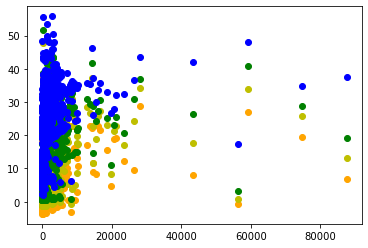

In [17]:
#matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.ZG,color='r') 
matplotlib.pyplot.scatter(Shot_RH.SUM_m_agb,Shot_RH.MAX_RH25,color='orange') 
matplotlib.pyplot.scatter(Shot_RH.SUM_m_agb,Shot_RH.MAX_RH50,color='y')
matplotlib.pyplot.scatter(Shot_RH.SUM_m_agb,Shot_RH.MAX_RH75,color='g')
matplotlib.pyplot.scatter(Shot_RH.SUM_m_agb,Shot_RH.MAX_RH100,color='b')
matplotlib.pyplot.show()

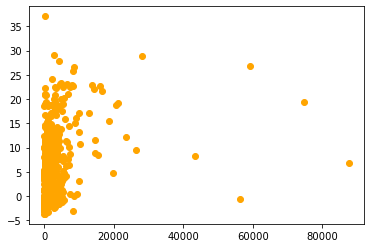

In [18]:
matplotlib.pyplot.scatter(Shot_RH.SUM_m_agb,Shot_RH.MAX_RH25,color='orange') 

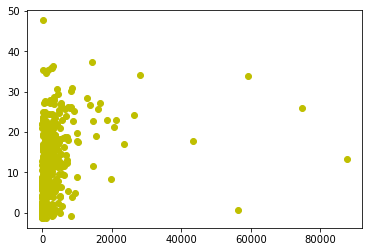

In [19]:
matplotlib.pyplot.scatter(Shot_RH.SUM_m_agb,Shot_RH.MAX_RH50,color='y')

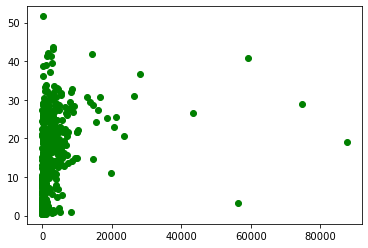

In [20]:
matplotlib.pyplot.scatter(Shot_RH.SUM_m_agb,Shot_RH.MAX_RH75,color='g')

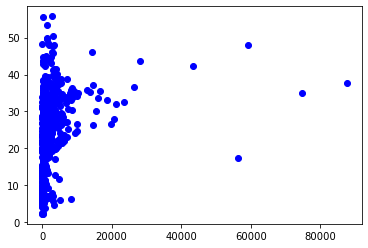

In [21]:
matplotlib.pyplot.scatter(Shot_RH.SUM_m_agb,Shot_RH.MAX_RH100,color='b')